# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# DFT-Eigenschaften

${\displaystyle X_{k}=\sum _{n=0}^{N-1}x_{n}\cdot e^{-{\frac {i2\pi }{N}}kn}}$

- $x_n$: zeit-diskretes Signal
- $k$: Frequenz-Koeffizienten-Index (wievielte Frequenz? "k-te Frequenz)
- $N$: Anzahl der Samples im Signal
- $n$: Sample-Index

In [3]:
def calc_dft(x):

    N = x.size
    n = np.arange(N)
    X = np.zeros(N, dtype=complex)

    for k in range(N):

        X[k] = np.sum(x * np.exp(-1j * 2 * np.pi * k * n / N))

    return X

## Bedeutung von $k$

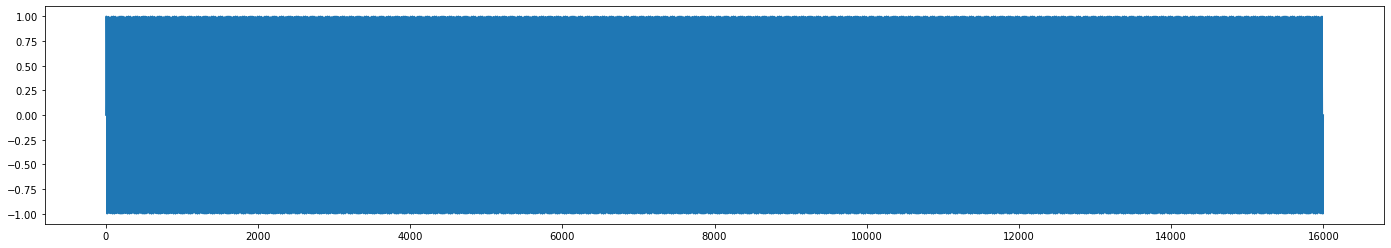

In [4]:
sr = 8000
freq = 330
length = 2
t = np.linspace(0, length, length * sr)
x = np.sin(t * 2 * np.pi * freq)

plt.figure(figsize=(24, 4))
plt.plot(x)
plt.show()

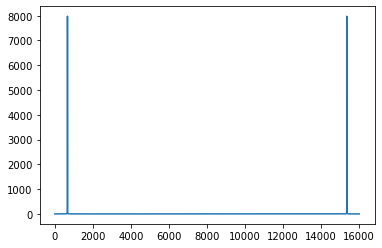

In [5]:
X = calc_dft(x)

plt.plot(np.abs(X))
plt.show()

# x-Achse:
# Vorsicht: nicht Freq in Hz
# sondern: k-te Frequenz

## Symmetrie der DFT

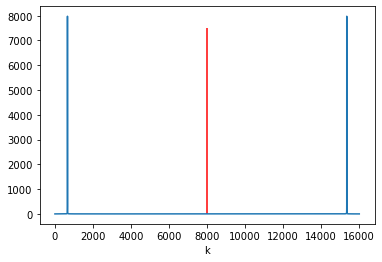

In [6]:
# X = calc_dft(x)

plt.plot(np.abs(X))
plt.vlines(sr / 2 * length, -0.5, 7500, 'r')
plt.xlabel('k')
plt.show()

# x-Achse:
# mittig: Nyquist-Frequenz-Grenze
# messbar sind genau so viele Frequenzen, wie sich Samples im Signal befinden
# mittig: Nyquist-Frequenz-Grenze

## Frequenz-Auflösung und Frequenz-Koeffizienten

In [8]:
# sr = 8000
# length = 2 # (sec)

# k = 0 --> 0 Hz
# k = 1 --> 0.5 Hz
# k = 2 --> 1 Hz
# k = 3 --> 1.5 Hz
# k = 660 --> 330 Hz
# Frequenz-Aufloesung: 0.5 Hz

In [12]:
# Formel zum Berechnen der Freq. in Hz. (Frequenz-Koeffizient) fuer eine gegebene k-te Freq. 
# f = k * sr / N

def calc_f_coef(k, sr, N):
    return k * sr / N

N = x.size
print(calc_f_coef(k=0, sr=sr, N=N))
print(calc_f_coef(k=1, sr=sr, N=N))
print(calc_f_coef(k=660, sr=sr, N=N))

#########
print('--------\n', calc_f_coef(k=1, sr=6000, N=3000))

0.0
0.5
330.0
--------
 2.0


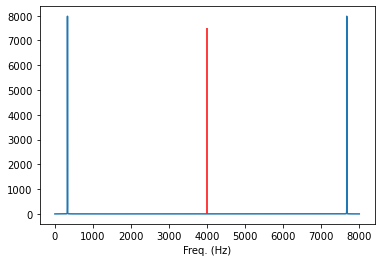

In [13]:
ks = calc_f_coef(k=np.arange(N), sr=sr, N=N)

# X = calc_dft(x)

plt.plot(ks, np.abs(X))
plt.vlines(sr / 2, -0.5, 7500, 'r')
plt.xlabel('Freq. (Hz)')
plt.show()

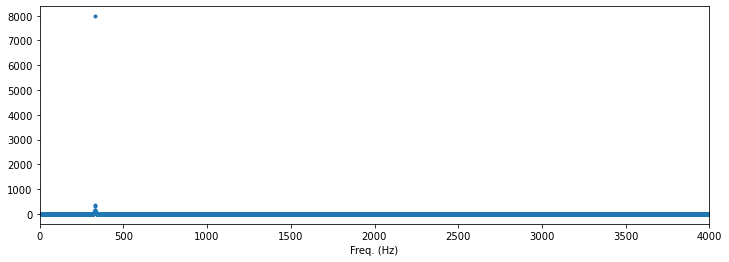

In [18]:
ks = calc_f_coef(k=np.arange(N), sr=sr, N=N)

# X = calc_dft(x)

plt.figure(figsize=(12, 4))
plt.plot(ks, np.abs(X), '.')
plt.xlabel('Freq. (Hz)')
plt.xlim(0, sr / 2)
plt.show()

# y-Achse:
#   Magnitude (gleichbedeutend mit dem absoluten Wert)

## Dirac-Imuls

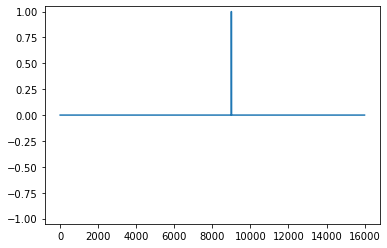

In [19]:
x = np.zeros(sr * length)
# x[200] = 1
x[9000] = 1
# --> egal wo sich der Dirac-Impuls befindet, die Magnituden der DFT veraendern sich nicht
#     l--> wir wissen, welche Frequenzen sich im Signal befinden, aber nicht, wann

plt.plot(x)
plt.ylim(-1.05, 1.05)
plt.show()

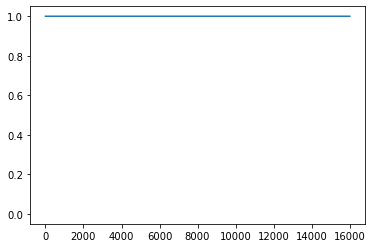

In [20]:
X = calc_dft(x)

plt.plot(np.abs(X))
plt.ylim(-0.05, 1.05)
plt.show()

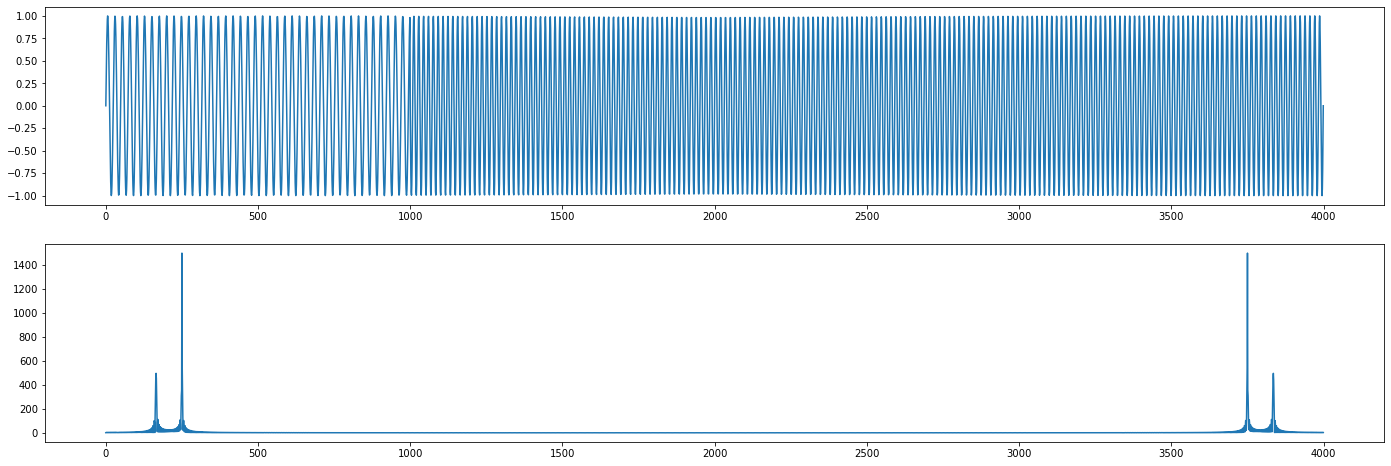

In [21]:
sr = 8000
length = 0.5
freq1, freq2 = 330, 500
t = np.linspace(0, length, int(sr * length))
# freq_transition = int(length * sr / 2)
freq_transition = int(length * sr / 4)
x = np.concatenate((
#     np.sin(t[:freq_transition] * 2 * np.pi * freq1) / 3,
    np.sin(t[:freq_transition] * 2 * np.pi * freq1),
    np.sin(t[freq_transition:] * 2 * np.pi * freq2)
))

X = calc_dft(x)

plt.figure(figsize=(24, 8))
plt.subplot(2, 1, 1)
plt.plot(x)
plt.subplot(2, 1, 2)
plt.plot(np.abs(X))
plt.show()

In [ ]:
# Magnituden koennen widerspiegeln
# 1. mit welcher Amplitude eine Frequenz sich im Signal befindet
# 2. wie lange sich eine Frequenz im Signal befindet

## Begriffsunterscheidungen / Abkürzungen

In [ ]:
# --> STFT ((Discrete) Short-Time Fourier Transform)

# FT -->  Fourier Transform (continuous domain)
# DFT --> Discrete Fourier Transform
# STFT --> Short-Time Fourier Transform |||| (Discrete)
# FFT --> Fast-Fourier Transform (schnelle Version der DFT)

# Heisenbergs Unschärferelation

$\Delta n \cdot \Delta \xi = \dfrac{N}{2 \pi}$

- $\Delta n$ steht für die Zeitauflösung
- $\Delta \xi$ steht für die Frequenzauflösung
- $N$ steht für die Anzahl der Samples im Signal

Die Formel sagt aus, dass ein Trade-off zwischen Zeit- und Frequenz-Auflösung besteht.

z.B.:
1. gute Zeitauflösung führt zu schlechter/grober Frequenzauflösung
2. andersherum: gute Frequenzauflösung führt zu schlechter/grober Zeitauflösung
3. Frequenz- und Zeit-Auflösung können ausbalanciert werden

# LaTeX in markdown 

Formeln in Markdown mit [Latex](https://www.latex-project.org/)

## Formeln im Fließtext

```Markdown
Diese Formel: $a^2 + b^2 = c^2$ bleibt im Fließtext.
```

Diese Formel: $a^2 + b^2 = c^2$ bleibt im Fließtext.

## Formeln alleinstehend

```Markdown
Diese Formel: $$e^{\pi i} = -1$$ bekommt einen eigenen Absatz.
```

Diese Formel: $$e^{\pi i} = -1$$ bekommt einen eigenen Absatz.